In [9]:
import glob
import cv2
from PIL import Image,ImageDraw
import numpy as np
import re,json,os
from pathlib import Path
from Card import Card
from PerspectiveTransform import PerspectiveTransform

In [2]:
files = glob.glob("interim_data/*.png")
files = [f.rstrip(".png") for f in files]

In [10]:
change_perspective = PerspectiveTransform()

4s


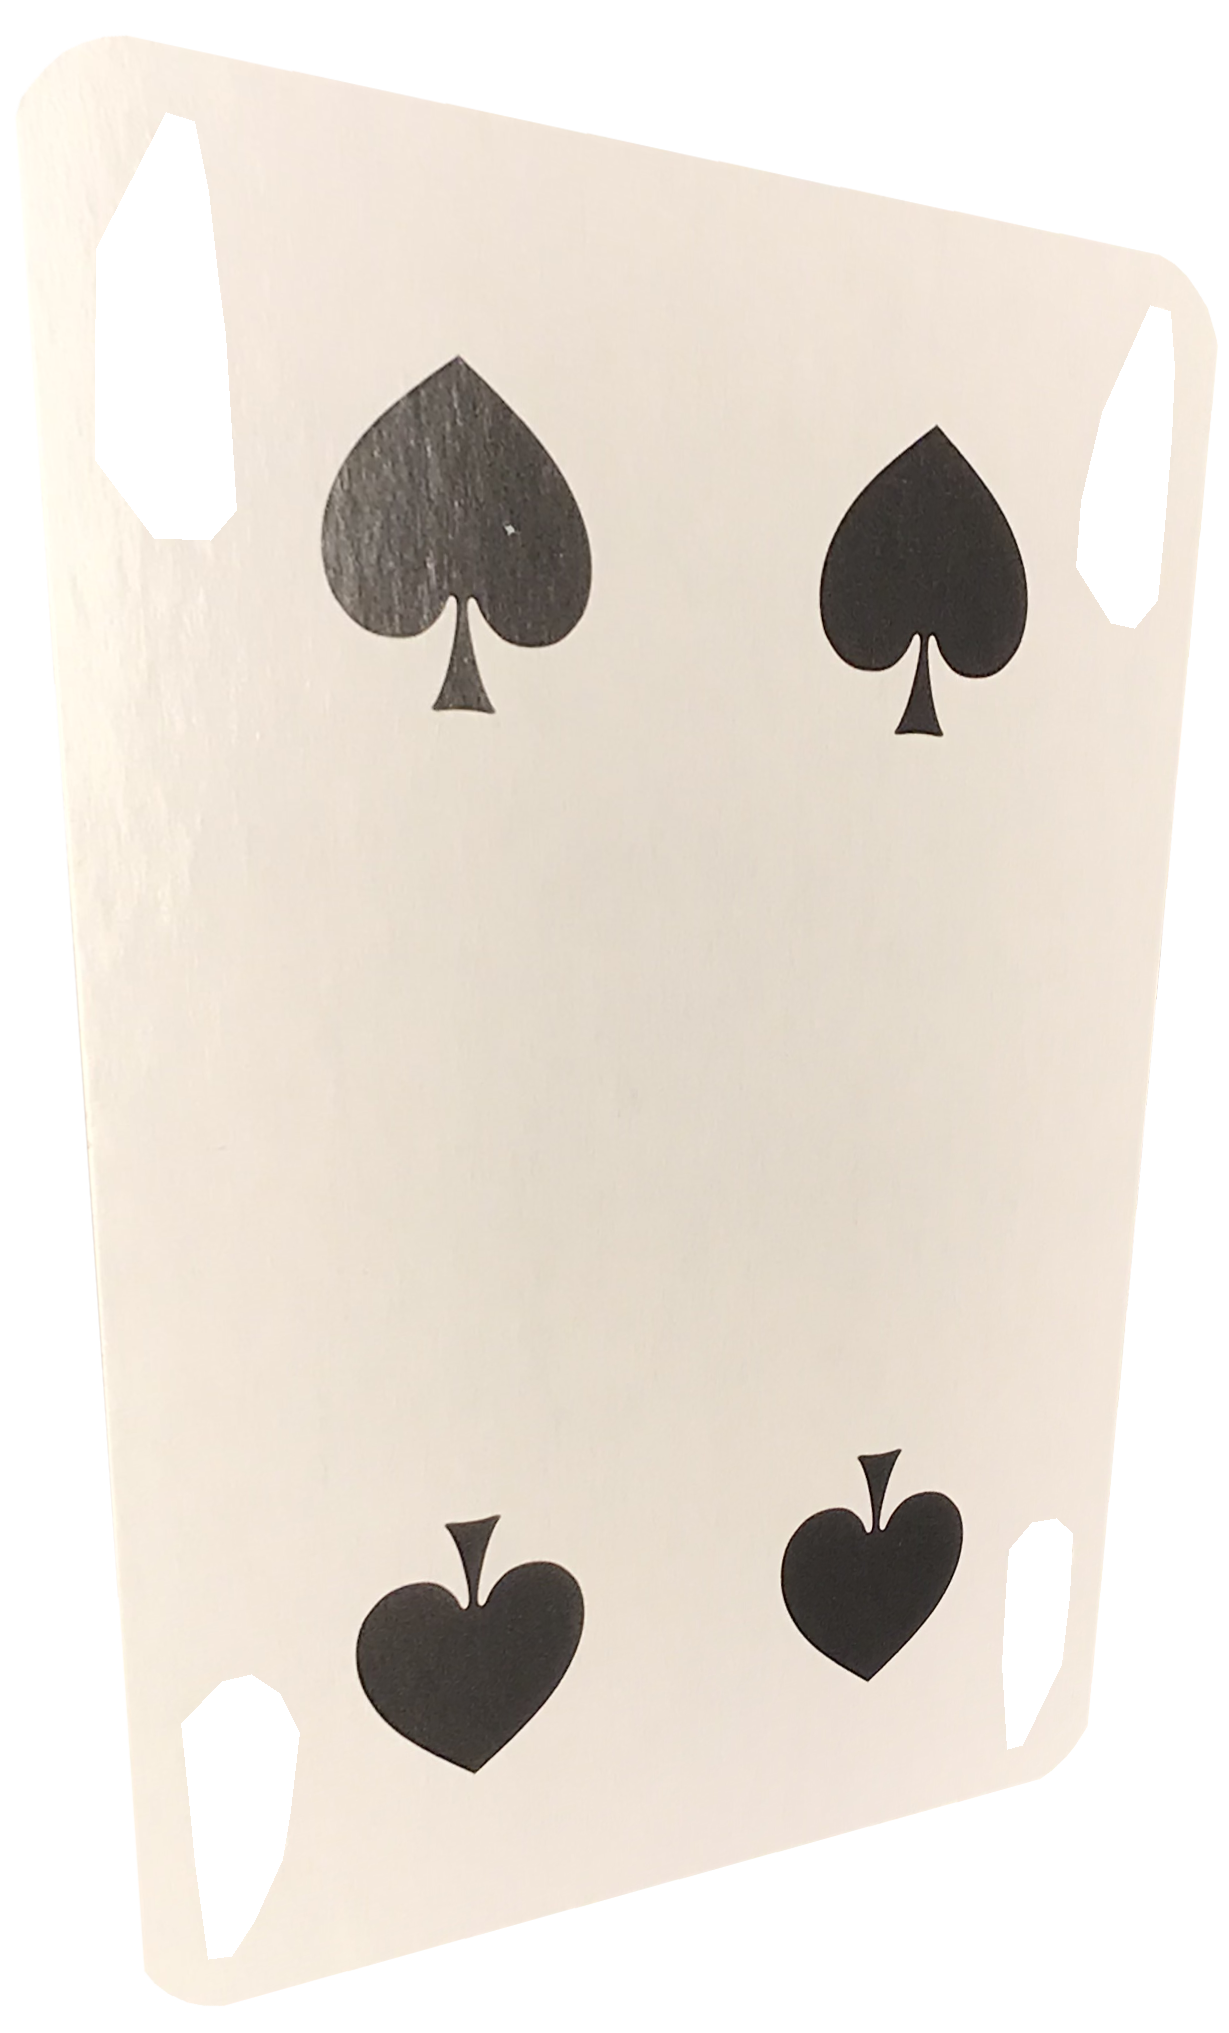

Ks


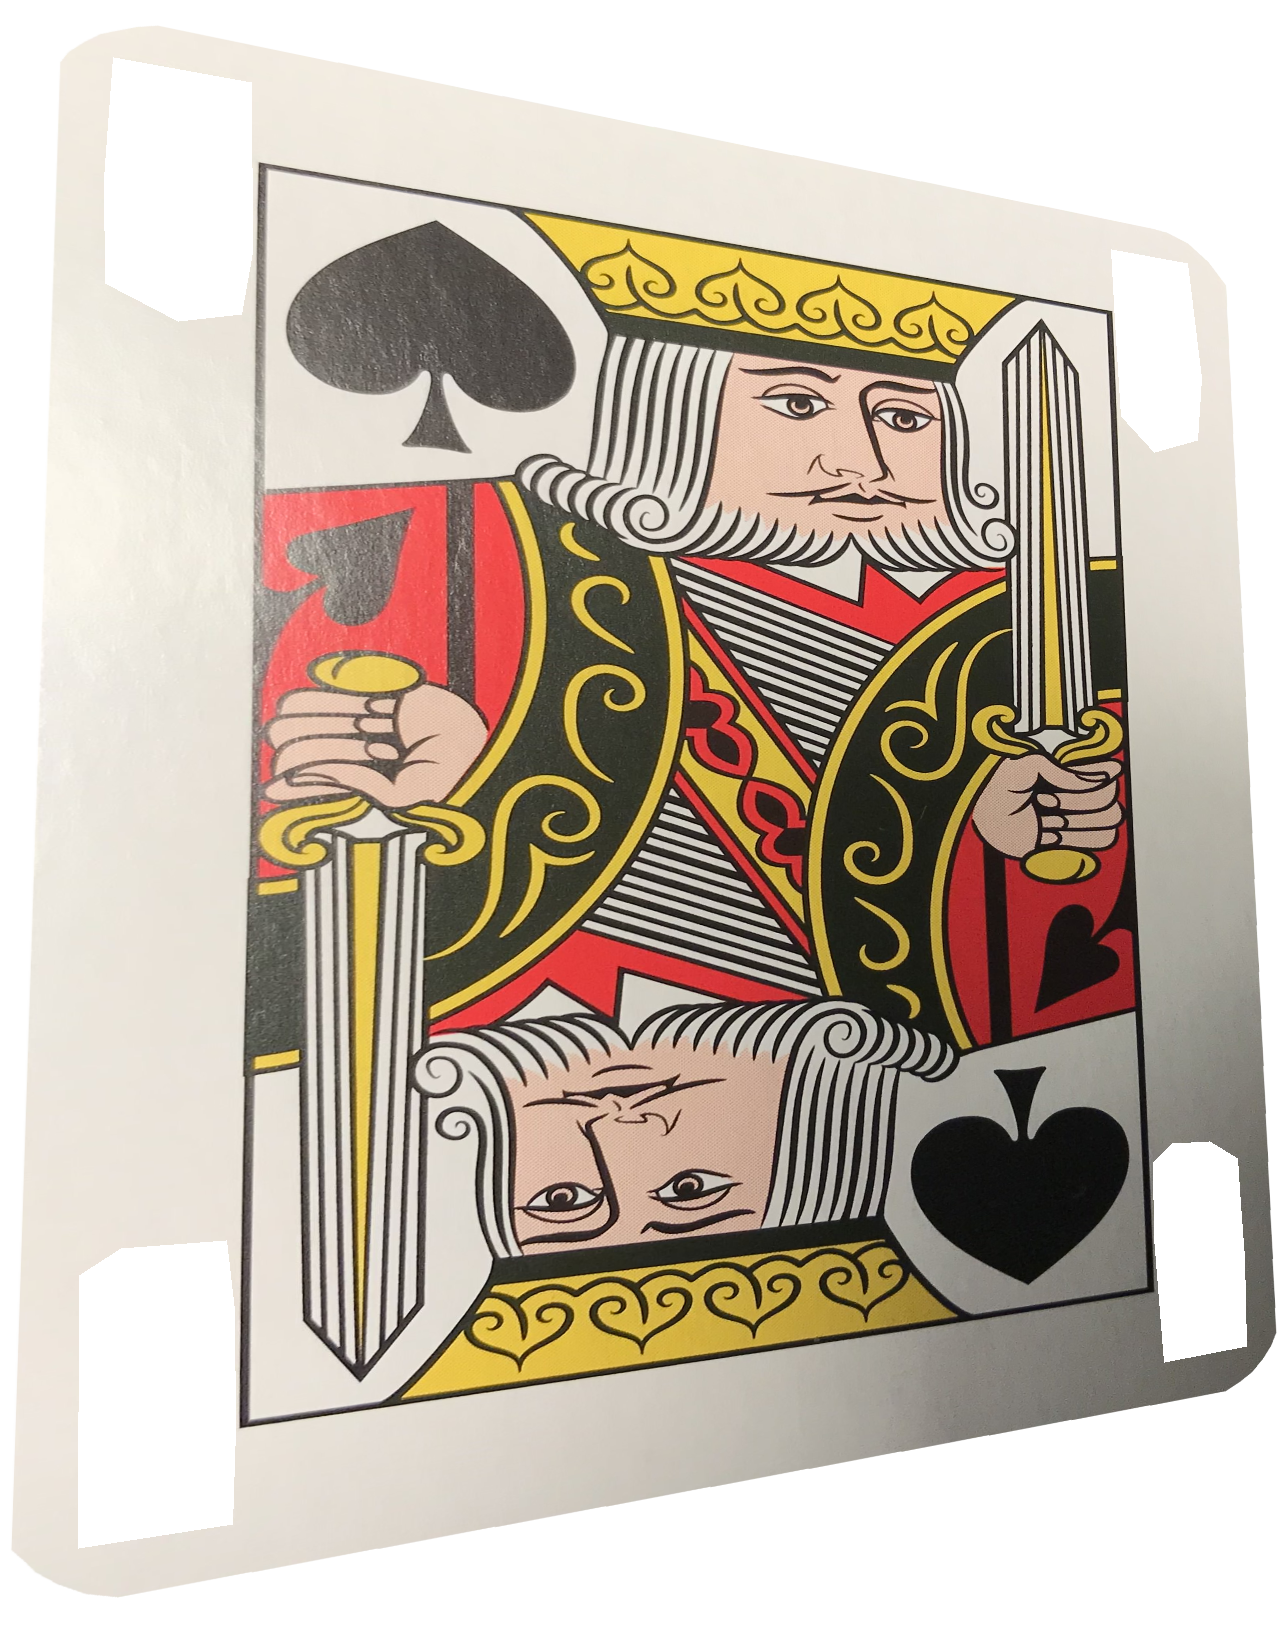

10c


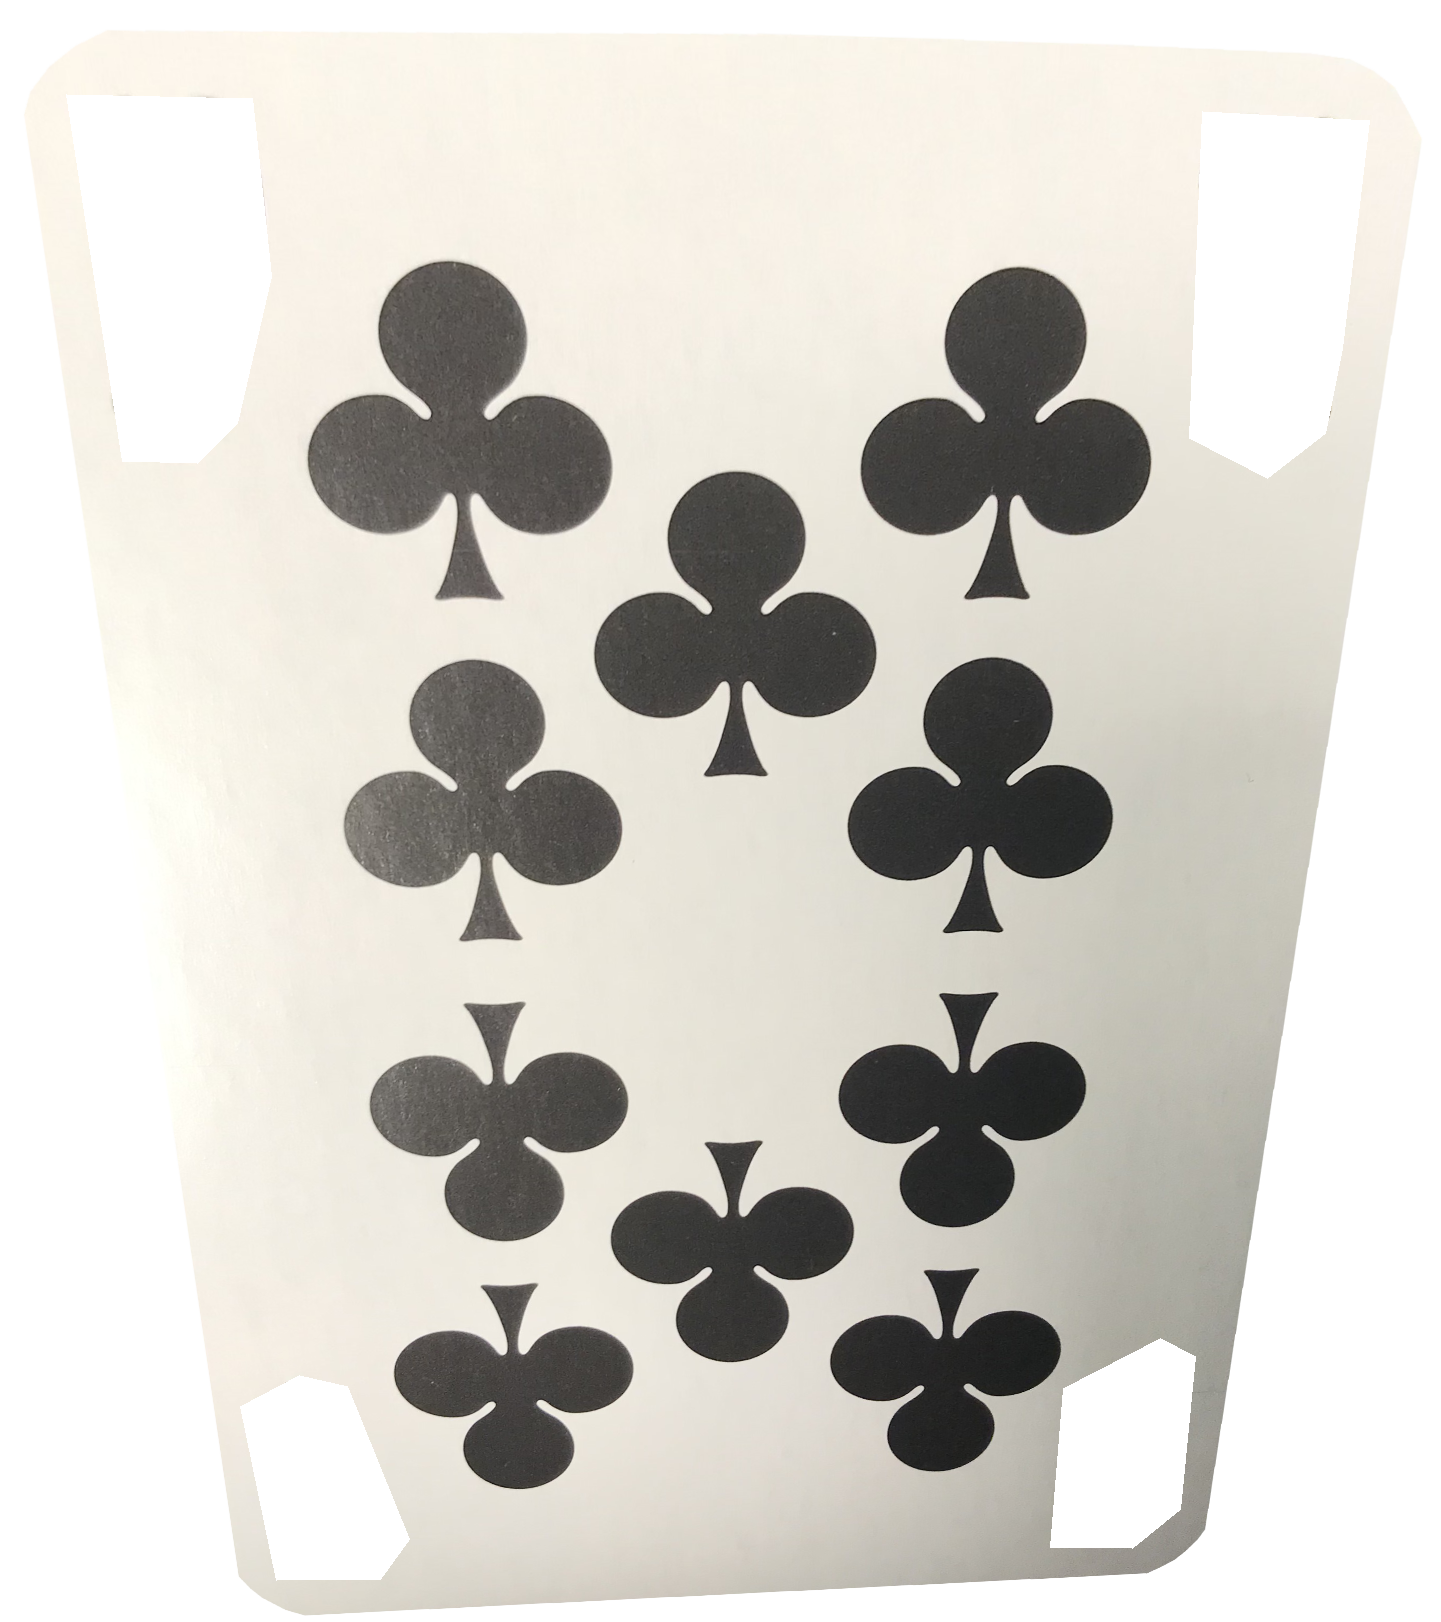

7h


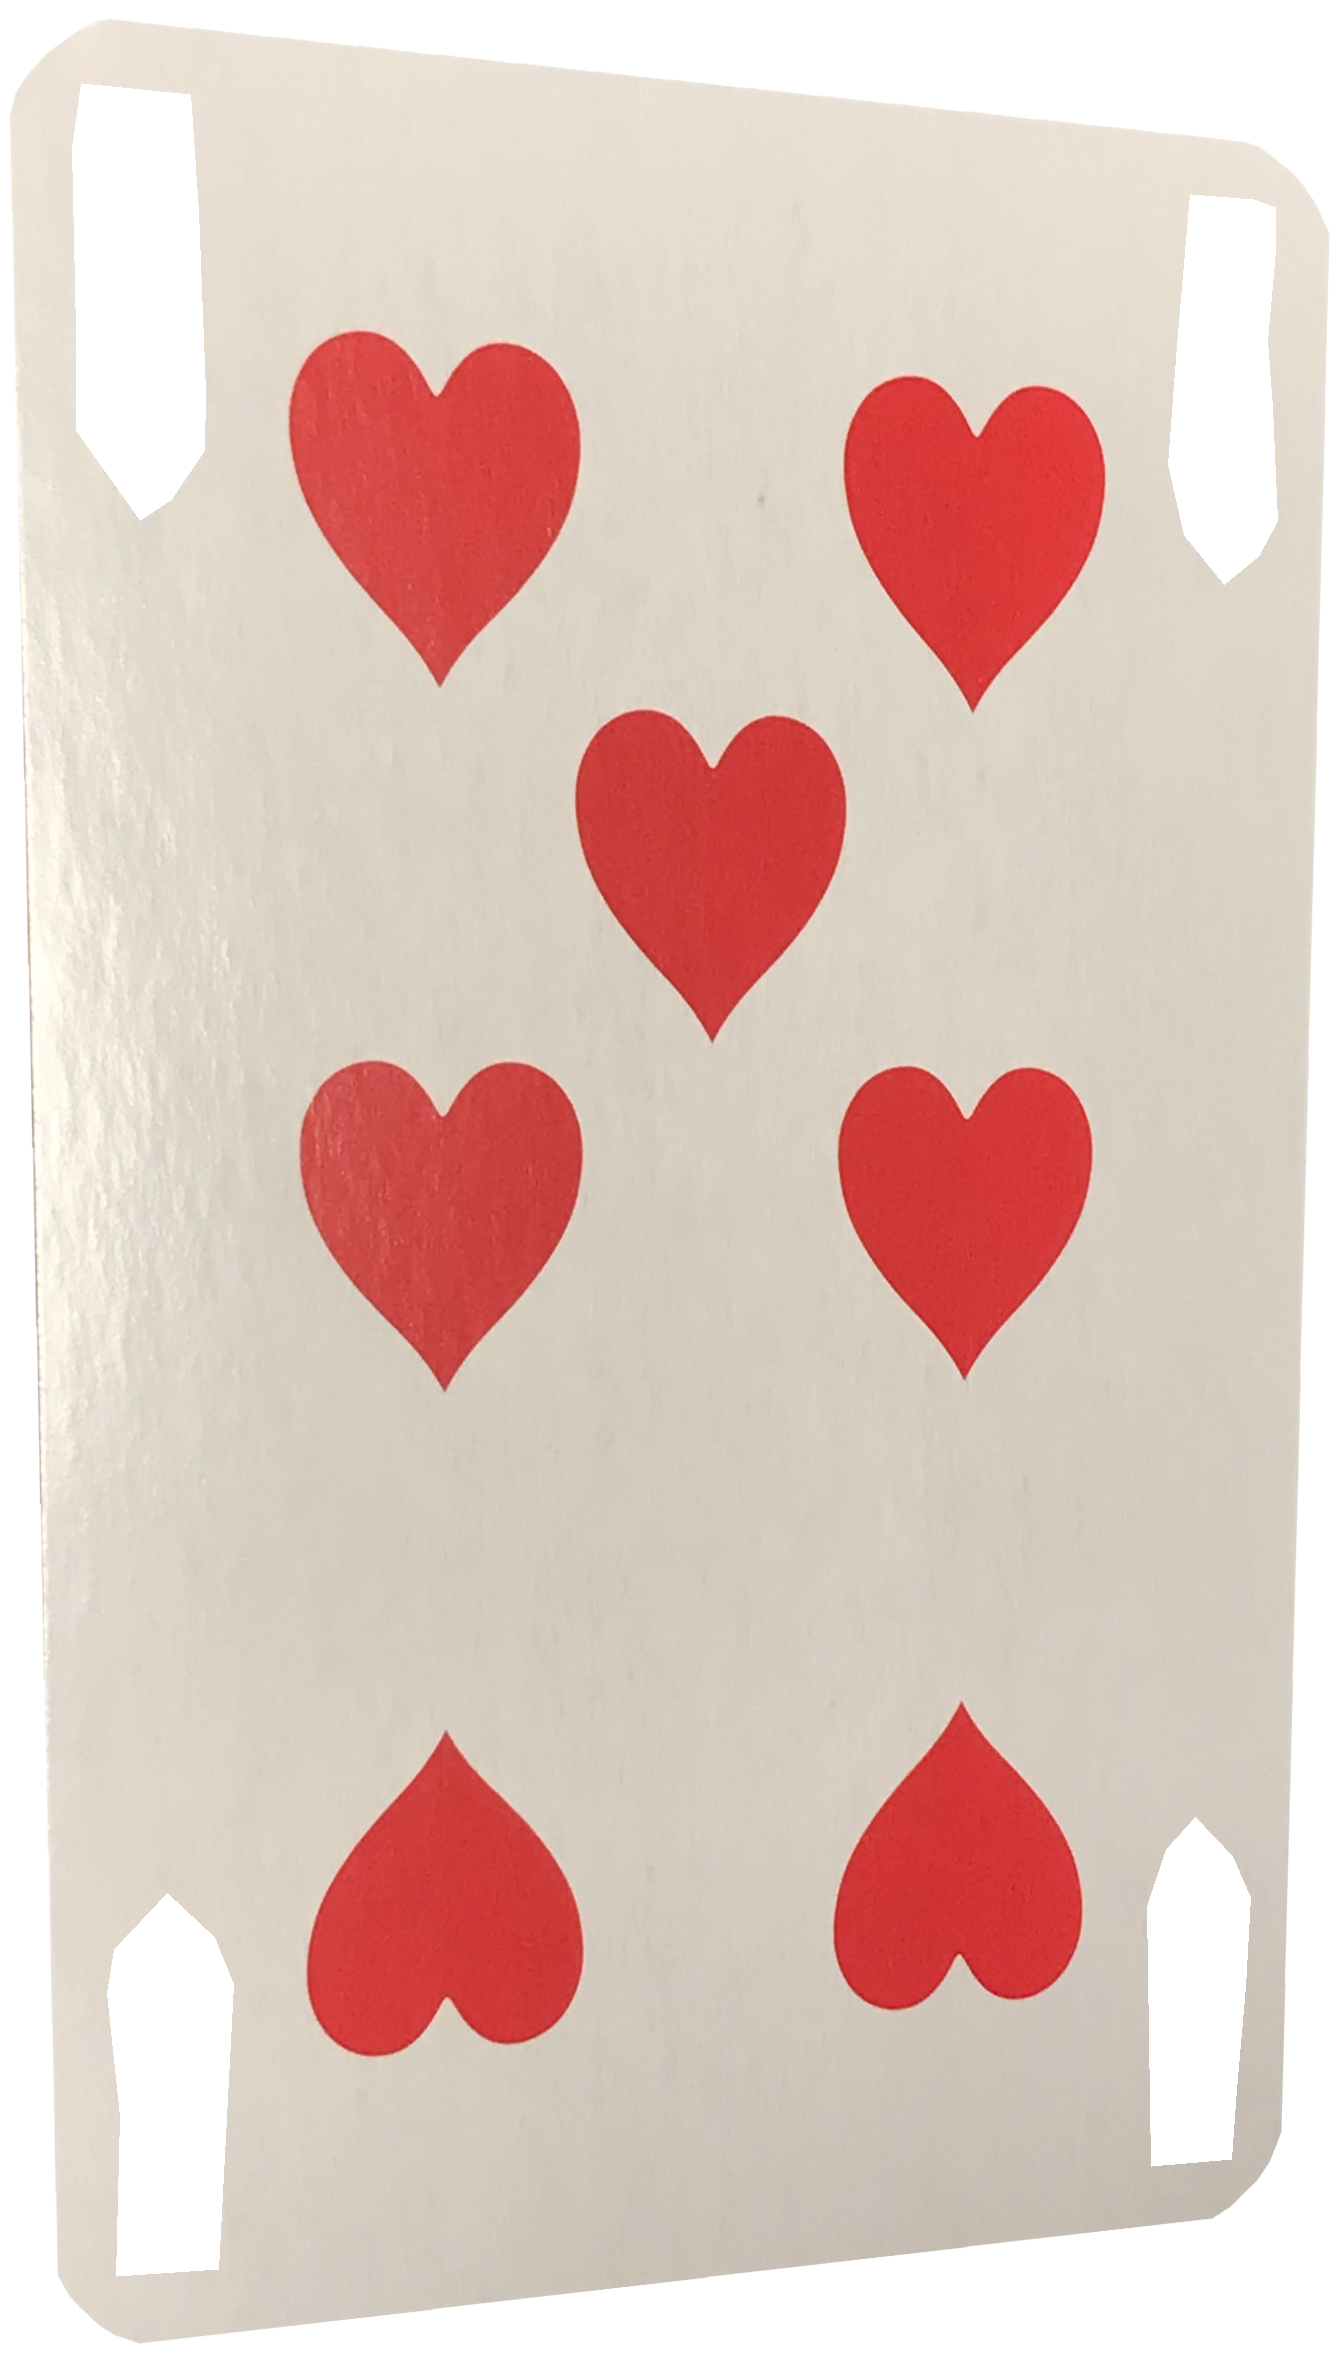

4h


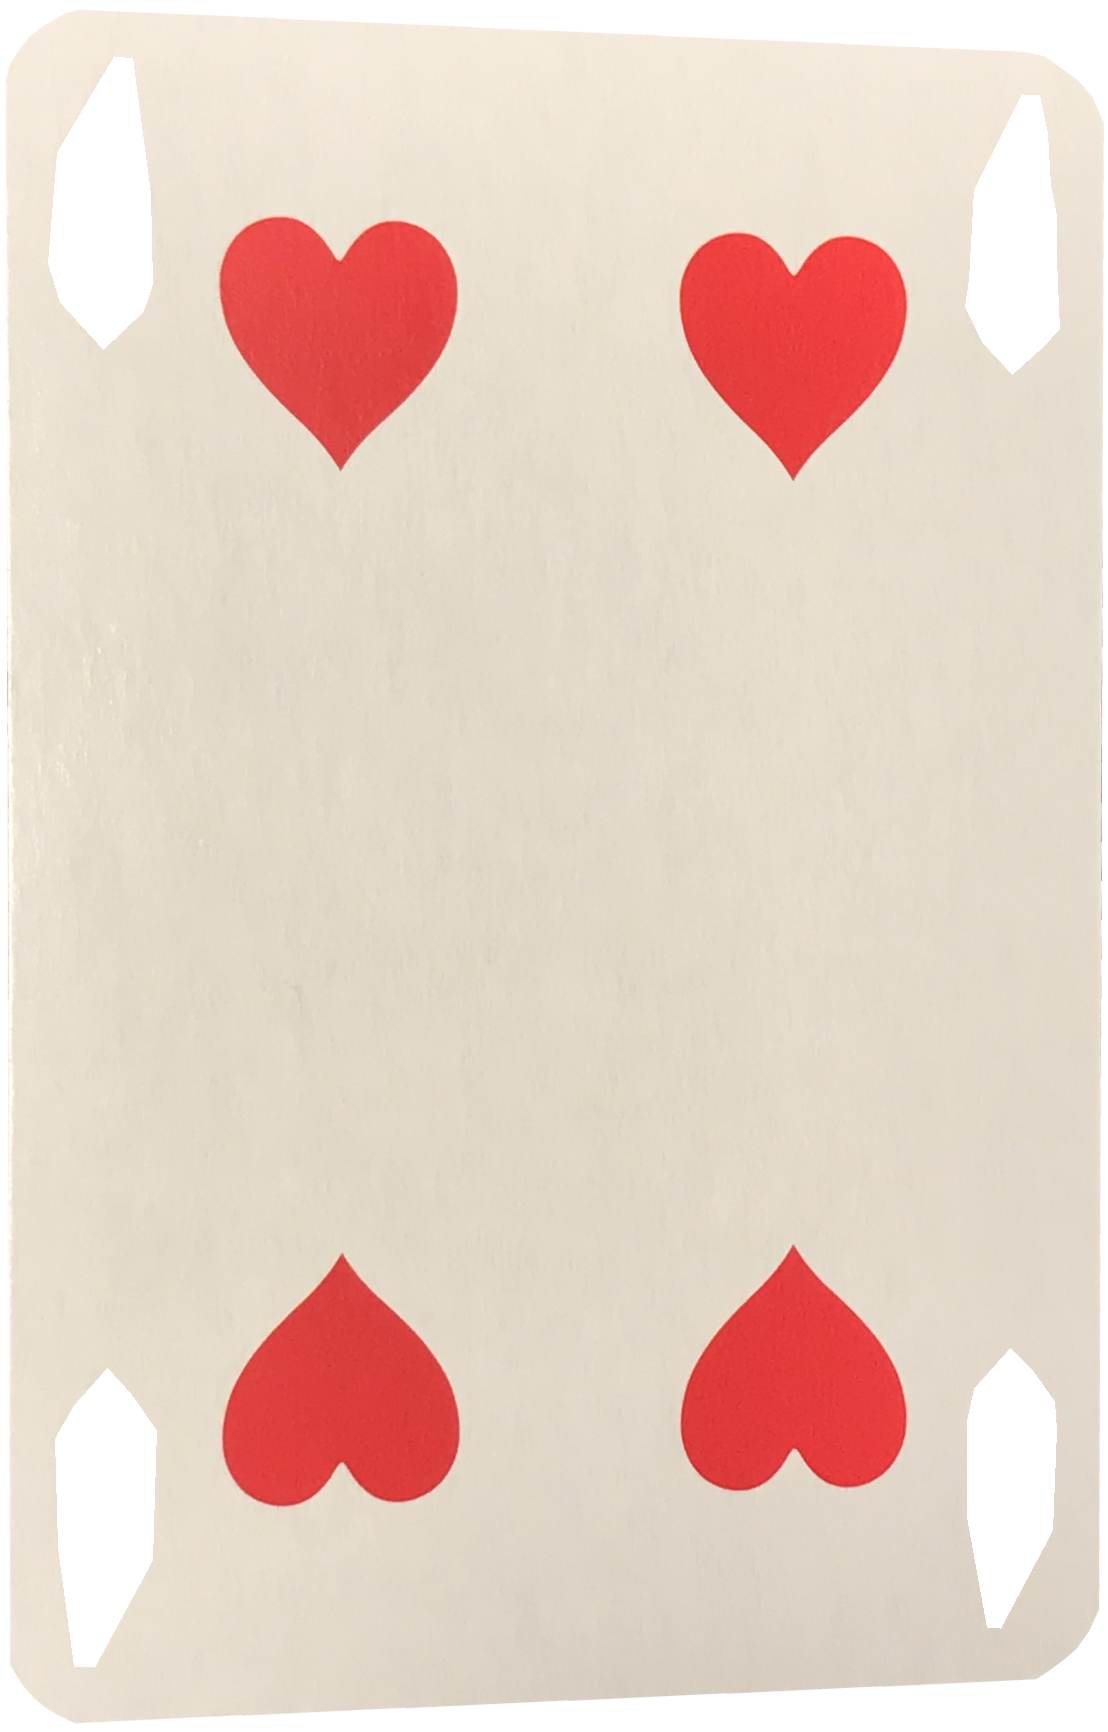

9c


KeyboardInterrupt: 

In [11]:
for file in files:
    print(file.split("/")[-1])
    annots =  json.load(open(file+".json",'r'))
    card_polygon = annots['card_polygon']
    label_polygons = annots['label_polygons']
    image = cv2.imread(file+".png",cv2.IMREAD_UNCHANGED)
    augmented_card = change_perspective({'image':image,'label_polygons':label_polygons,'card_polygon':card_polygon})
    test = Image.fromarray(augmented_card['image']) 
    for polygon in  augmented_card['label_polygons']:
        polygon = [tuple(i) for i in polygon]
        ImageDraw.Draw(test).polygon(polygon,fill=255, outline=255)
    imshow(np.array(test))